#  📊 Forecasting Weekly Sales Based on Advertising Spend

**Problem Statement**

Predict the amount of Weekly_Sales (kUSD) for a future week given the money spent that week on TV, Radio and Social media (all in kUSD).

----

### Data Overview
- **TV_Spend_kUSD**: Amount spent on TV advertisement per week in thousands of dollars
- **Radio_Spend_kUSD**: Amount spent on Radio advertisement per week in thousands of dollars 
- **Social_Spend_kUSD**: Amount spent on the social media advertisement per week in thousands of dollars
- **Weekly_Sales_kUSD**: Amount generated from sales of goods per week in thousands of dollars

### Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
sns.set()

### Load the data

In [2]:
df = pd.read_csv('https://github.com/adepegba1/Dataset/blob/main/marketing_sales_large.csv?raw=True')
df.head()

,TV_Spend_kUSD,Radio_Spend_kUSD,Social_Spend_kUSD,Weekly_Sales_kUSD
0,19.6,7.8,6.4,46.5
1,29.1,14.3,7.5,68.0
2,30.1,12.4,8.3,71.7
3,8.6,9.5,9.8,34.6
4,17.5,12.5,11.2,56.3


### Quick Exploratory Data Analysis (EDA)

In [3]:
# Number of rows and columns
df.shape

(300, 4)

In [4]:
# Checking for null values in any of the column
df.isnull().sum()

TV_Spend_kUSD        0
Radio_Spend_kUSD     0
Social_Spend_kUSD    0
Weekly_Sales_kUSD    0
dtype: int64

In [5]:
# Statistical information about the numeric data field
df.describe()

,TV_Spend_kUSD,Radio_Spend_kUSD,Social_Spend_kUSD,Weekly_Sales_kUSD
count,300.000000,300.000000,300.000000,300.000000
mean,19.124667,9.715667,7.977667,47.140667
std,7.941154,3.802137,3.152193,13.982127
min,1.000000,0.000000,0.000000,9.100000
25%,14.125000,7.000000,5.900000,38.150000
50%,19.650000,10.100000,8.000000,47.950000
75%,24.600000,12.125000,10.225000,56.150000
max,40.000000,20.000000,15.000000,82.400000


### Correlation and Visualization

In [6]:
df.corr()['Weekly_Sales_kUSD']

TV_Spend_kUSD        0.860085
Radio_Spend_kUSD     0.340271
Social_Spend_kUSD    0.171111
Weekly_Sales_kUSD    1.000000
Name: Weekly_Sales_kUSD, dtype: float64

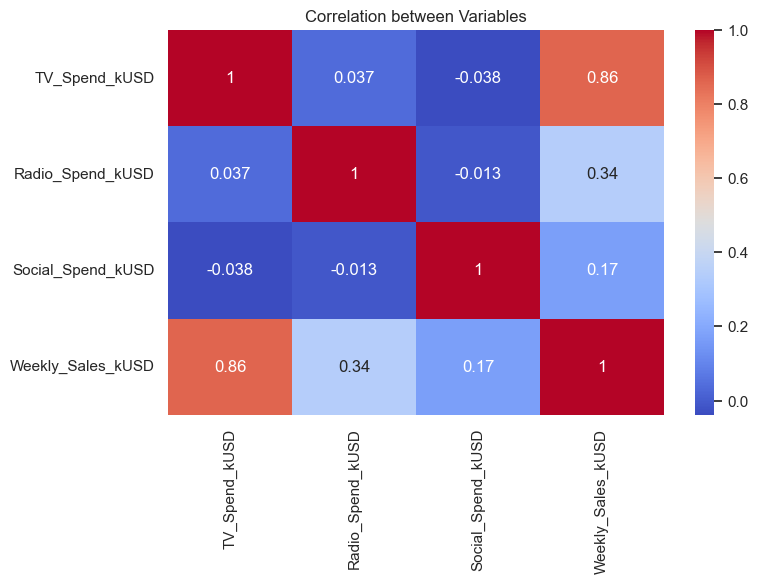

In [7]:
corr = df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation between Variables')
plt.show()

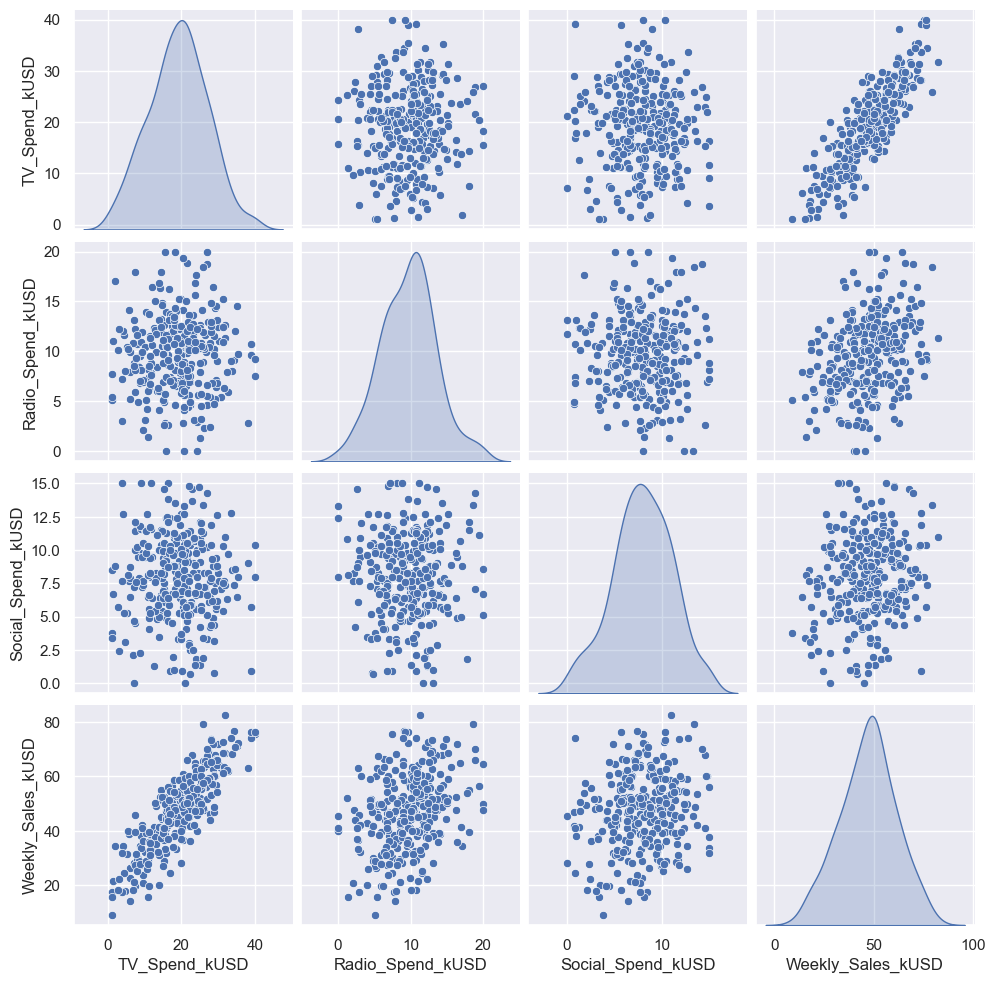

In [8]:
sns.pairplot(df, vars=['TV_Spend_kUSD','Radio_Spend_kUSD','Social_Spend_kUSD','Weekly_Sales_kUSD'],
             diag_kind='kde')
plt.show()

From the visualization above, there is a positive correlation and a linear relationship between TV_Spend_kUSD and Weekly_Sales_kUSD (r = 0.86). This means that as the amount of money spent on TV advertising increases, the weekly revenue generated also tends to increase.

### Train a Decision Tree Regressor

In [9]:
# Declare the independent and dependent variable
X = df.drop(['Weekly_Sales_kUSD'], axis=1) # Independent variable
y = df['Weekly_Sales_kUSD'] # Dependent variable

In [10]:
# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Initialise the Decision Tree Regressor
reg_tree = DecisionTreeRegressor(max_depth=3, random_state=42)

In [12]:
# Building a decision tree from the training dataset
reg_tree.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [13]:
# Predicting the result of the model on train and test data
y_train_pred = reg_tree.predict(X_train)
y_test_pred = reg_tree.predict(X_test)

In [14]:
# Train MSE and R2 Score
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Test MSE and R2 Score
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

In [15]:
print(f"MAE Train: {mae_train:.4f}, R2 Score Train: {r2_train:.4f}")
print(f"MAE Test: {mae_test:.4f}, R2 Score Test: {r2_test:.4f}")

MAE Train: 4.8504, R2 Score Train: 0.8070
MAE Test: 6.7310, R2 Score Test: 0.6344


- MAE Train: 4.8504
    - Means the model's predictions on the training set are off by 4.8504 kUSD on average → about $4,850 per week on average.
- R2 Score Train: 0.8070
    - The model explains ~80.7% of the variance in training weekly sales. This is a strong fit on the training data.

- MAE Test: 6.7310
    - On unseen (test) data, the average error is 6.7310 kUSD → about $6,731 per week on average.

- R2 Score Test: 0.6344
    - The model explains ~63.4% of the variance in the test set. Performance is worse than on training data but still captures a majority of variance.'
 
**Interpretation and what it implies**

Generalisation gap: train R2 0.807 → test R2 0.634 (drop ≈ 0.173). MAE increases from 4.85 → 6.73 kUSD (≈ +39%).

This indicates some overfitting: the tree learned patterns that fit training data better than unseen data, but the gap is moderate (model still useful on test set).

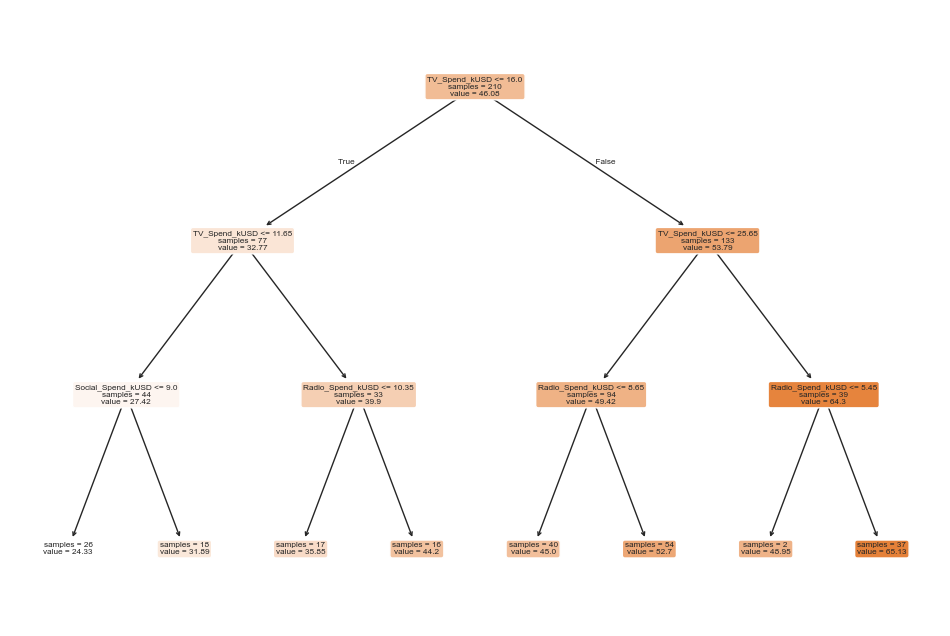

In [16]:
# Graphical representation of the Decision Tree Regressor
plt.figure(figsize=(12,8))
plot_tree(reg_tree,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          impurity=False,
          precision=2)
plt.show()

In [17]:
# creating a new data to predict the weekly sales
X_data = pd.DataFrame(
    {'TV_Spend_kUSD': [17.5, 20, 30], 
    'Radio_Spend_kUSD': [12.5, 5, 11], 
    'Social_Spend_kUSD': [11.2, 2, 15]
    }
)
X_data.head()

,TV_Spend_kUSD,Radio_Spend_kUSD,Social_Spend_kUSD
0,17.5,12.5,11.2
1,20.0,5.0,2.0
2,30.0,11.0,15.0


In [18]:
# The predicted data base on the new DataFrame
X_data_pred = reg_tree.predict(X_data)
X_data_pred_rounded = np.round(X_data_pred,1)

In [19]:
# Append the result to the dataframe
X_data['Weekly_Sales_kUSD'] = X_data_pred_rounded

In [20]:
X_data.head()

,TV_Spend_kUSD,Radio_Spend_kUSD,Social_Spend_kUSD,Weekly_Sales_kUSD
0,17.5,12.5,11.2,52.7
1,20.0,5.0,2.0,45.0
2,30.0,11.0,15.0,65.1
